In [50]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [51]:
import base64
import requests


def get_as_base64(url):
    return base64.b64encode(requests.get(url).content)

In [52]:
df = pd.read_csv('database.csv', dtype={'aide': 'object'})
df

,aide,img
0,1,https://webicalife.herokuapp.com/logo3.png
1,2,https://webicalife.herokuapp.com/logo3.png
2,3,https://webicalife.herokuapp.com/logo3.png
3,4,https://webicalife.herokuapp.com/logo3.png
4,5,https://webicalife.herokuapp.com/logo3.png
5,6,https://webicalife.herokuapp.com/logo3.png
6,7,https://webicalife.herokuapp.com/logo3.png
7,8,https://webicalife.herokuapp.com/logo3.png
8,9,https://webicalife.herokuapp.com/logo3.png


In [53]:
df.dtypes

aide    object
img     object
dtype: object

In [54]:
df['img64'] = df['img'].apply(lambda x : 'data:image/png;base64,'+str(get_as_base64(x))[2:-1])
df

,aide,img,img64
0,1,https://webicalife.herokuapp.com/logo3.png,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
1,2,https://webicalife.herokuapp.com/logo3.png,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
2,3,https://webicalife.herokuapp.com/logo3.png,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
3,4,https://webicalife.herokuapp.com/logo3.png,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
4,5,https://webicalife.herokuapp.com/logo3.png,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
5,6,https://webicalife.herokuapp.com/logo3.png,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
6,7,https://webicalife.herokuapp.com/logo3.png,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
7,8,https://webicalife.herokuapp.com/logo3.png,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
8,9,https://webicalife.herokuapp.com/logo3.png,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."


In [59]:
df['query'] ="WITH tp as (INSERT INTO picture (source) VALUES ('" + df['img64'] +"') RETURNING idpicture) INSERT INTO item (idUser, lastEdition, idUnivers, idpicture, itemname, ref, provider, description ) VALUES (0, now(), 0, (SELECT idpicture FROM tp), " + df['aide'] + ', ' + df['aide'] + ', ' + df['aide'] + ', ' + df['aide'] + ') ;'
df

,aide,img,img64,query
0,1,https://webicalife.herokuapp.com/logo3.png,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",WITH tp as (INSERT INTO picture (source) VALUE...
1,2,https://webicalife.herokuapp.com/logo3.png,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",WITH tp as (INSERT INTO picture (source) VALUE...
2,3,https://webicalife.herokuapp.com/logo3.png,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",WITH tp as (INSERT INTO picture (source) VALUE...
3,4,https://webicalife.herokuapp.com/logo3.png,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",WITH tp as (INSERT INTO picture (source) VALUE...
4,5,https://webicalife.herokuapp.com/logo3.png,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",WITH tp as (INSERT INTO picture (source) VALUE...
5,6,https://webicalife.herokuapp.com/logo3.png,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",WITH tp as (INSERT INTO picture (source) VALUE...
6,7,https://webicalife.herokuapp.com/logo3.png,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",WITH tp as (INSERT INTO picture (source) VALUE...
7,8,https://webicalife.herokuapp.com/logo3.png,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",WITH tp as (INSERT INTO picture (source) VALUE...
8,9,https://webicalife.herokuapp.com/logo3.png,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",WITH tp as (INSERT INTO picture (source) VALUE...


"WITH tp as (INSERT INTO picture (source) VALUES ('') RETURNING idpicture) INSERT INTO item (idUser, lastEdition, idUnivers, idpicture, itemname, ref, provider, description ) VALUES (0, now(), 0, (SELECT idpicture FROM tp), 2, 2, 2, 2) ;"
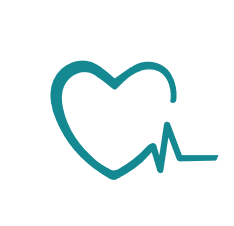

In [60]:
df.iloc[1,3]